In [43]:
using PyPlot
# rcParams = PyPlot.PyDict(PyPlot.matplotlib."rcParams")
# rcParams["font.size"] = 16
PyPlot.matplotlib.font_manager.fontManager.addfont("OpenSans-Regular.ttf")

# rcParams["font.family"] = "Open Sans"
# rcParams["axes.grid"] = true
# rcParams["lines.linewidth"] = 3
# rcParams["grid.linestyle"] = "--"
# rcParams["axes.edgecolor"] = (0.3, 0.3, 0.3)
# rcParams["axes.labelcolor"] = (0.3, 0.3, 0.3)
# rcParams["text.color"] = (0.3, 0.3, 0.3)
# rcParams["ytick.color"] = (0.3, 0.3, 0.3)
# rcParams["xtick.color"] = (0.3, 0.3, 0.3)

PyPlot.matplotlib.style.use("grandbudapest.mplstyle")
function draw_axes()
    axvline(x=0, color="0.6", lw=2, zorder=1)
    axhline(y=0, color="0.6", lw=2, zorder=1)
end

# markers = ["o", "*", "P", "X", "s", "D"]
# colorz = Dict("no gas" => "#95a5a6", "peace" => (0.0, 0.6, 0.8), "competition" => "#e74c3c")
colorz = Dict("no gas" => "k", "peace" => "C2", "cooperation" => "C0", "competition" => "C3")
marker = "X"

"X"

# entropy of the wheel

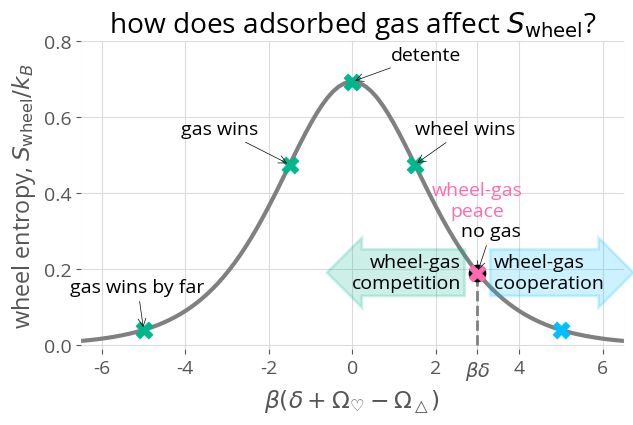

In [49]:
βθ = range(-6.5, 6.5, length=100)
w(βθ) = exp(-βθ) / (1.0 + exp(-βθ))
S(w) = -(w * log(w) + (1.0 - w) * log.(1.0 - w))

ht = 0.8 # height
wd = βθ[end] * 2 # width
function plot_θ(θ::Float64, marker::String, a_color, label::String, dx::Float64, dy::Float64)
    scatter([θ], [S(w(θ))], marker=marker, zorder=4, s=marker=="*" ? 1.35 * s : s, color=a_color)
#     text(θ + dx * wd, S(w(θ)) + dy * ht, label)
    if label == "none"
        return
    end
    if label != ""
        annotate(label,
                    xy=(θ, S(w(θ))), xycoords="data",
                    xytext=(θ + dx * wd, S(w(θ)) + dy * ht), textcoords="data",
                    arrowprops=Dict(:arrowstyle => "->", #linestyle="dashed",
                                    :color => "k"
                                    ),
                    zorder=1241,
                    )
    end
end

s = 150 # markersize
figure(figsize=(7, 4))
plot(βθ, S.(w.(βθ)), zorder=2, color="0.5", lw=3)
ylabel(L"wheel entropy, $S_\mathrm{wheel}/k_B$")
xlabel(L"$\beta(\delta +\Omega_\heartsuit-\Omega_\bigtriangleup)$")

# two-state model (no gas)
βδ = 3.0
plot_θ(βδ, "o", colorz["no gas"], "no gas", -0.03, 0.12)
text(βδ, 0.34, "wheel-gas" * "\n" * "peace", color=colorz["peace"], ha="center")
plot_θ(βδ, marker, colorz["peace"], "", 0.0, 0.0)

dx = 0.4
bbox_props = Dict(:boxstyle=>"rarrow,pad=0.2", :fc=>colorz["cooperation"], :ec=>colorz["cooperation"], :lw=>2, :alpha=>0.2)
text([βδ + dx], [S(w(βδ))], "wheel-gas\ncooperation ", ha="left", va="center", rotation=0,
            size=14,
            bbox=bbox_props)

bbox_props = Dict(:boxstyle=>"larrow,pad=0.2", :fc=>colorz["competition"], :ec=>colorz["competition"], :lw=>2, :alpha=>0.2)
text([βδ - dx], [S(w(βδ))], "wheel-gas\ncompetition", ha="right", va="center", rotation=0,
            size=14,
            bbox=bbox_props)


# with gas. wheel-gas peace
βΩ♡ = -1.0
βω△ = -3.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["cooperation"], "none", 0.1/sqrt(2), 0.1/sqrt(2))

# with gas. wheel-gas competition. wheel wins.
βΩ♡ = -2.5
βω△ = -1.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["competition"], "wheel wins", 0.0, 0.1)

# with gas. wheel-gas competition. detente
βΩ♡ = -4.0
βω△ = -1.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["competition"], "detente", 0.1/sqrt(2), 0.1/sqrt(2))

# with gas. wheel-gas competition. gas wins.
βΩ♡ = -5.5
βω△ = -1.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["competition"], "gas wins", -0.2, 0.1)

# with gas. wheel-gas competition. gas wins by far.
βΩ♡ = -9.0
βω△ = -1.0
θ = βδ+βΩ♡-βω△
plot_θ(θ , marker, colorz["competition"], "gas wins by far", -0.135, 0.125)

# # legend(numpoints=1, bbox_to_anchor=(1, 0.8))
title(L"how does adsorbed gas affect $S_\mathrm{wheel}$?")
# # draw_axes()
xlim([-wd/2, wd/2])
ylim([-0.01, ht])

vlines(βδ, 0.0, S(w(βδ)), linestyle="--", color="0.5")
x_t = collect(-6:2:6)
x_tl = [@sprintf("%d", x_i) for x_i in x_t]
push!(x_t, βδ)
push!(x_tl, L"$\beta\delta$")
xticks(x_t, x_tl)

savefig("wheel_entropy.pdf", format="pdf", bbox_inches="tight")

# Langmuir model

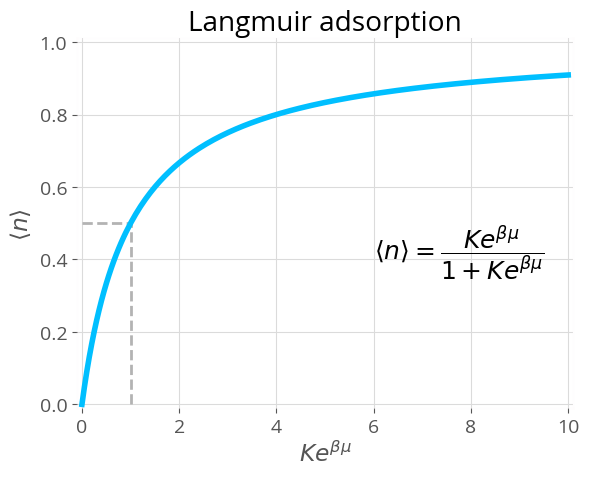

PyObject Text(0.5, 1.0, 'Langmuir adsorption')

In [76]:
kp = range(0.0, 10.0, length=200)
n = kp ./ (1 .+ kp)
figure()
plot(kp, n, linewidth=4)
ϵ=1e-1
xlim([0-ϵ, maximum(kp)+ϵ])
ϵ=1e-2
ylim([0-ϵ, 1+ϵ])
xlabel(L"$Ke^{\beta\mu}$")
ylabel(L"$\langle n \rangle$")
text(6, 0.4, L"$\langle n \rangle=\dfrac{Ke^{\beta\mu}}{1+Ke^{\beta\mu}}$", fontsize=18)
vlines(1, 0, 0.5, color="0.7", linestyle="--")
hlines(0.5, 0, 1, color="0.7", linestyle="--")
title("Langmuir adsorption")